# Justin Ward Spark Assignment 


In [1]:
import pyspark
conf = pyspark.SparkConf().setAppName('odl').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
sqlc = pyspark.sql.SQLContext(sc)

In [2]:
path = 'titanic.csv'

In [3]:
df = sqlc.read.format("csv").option("header","true").option("inferSchema", "true").load(path)

In [4]:
import pandas as pd
z = pd.read_csv(path,nrows=5)
z

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


## Converting data to parquet

In [4]:
parquetPath = '/home/ec2-user/SageMaker/Open-Data-Lab/education/jw8vw/parquet'
#df.write.parquet(parquetPath)

In [5]:
df = sqlc.read.parquet(parquetPath)
display(df)

DataFrame[PassengerId: int, Survived: int, Pclass: int, Name: string, Sex: string, Age: double, SibSp: int, Parch: int, Ticket: string, Fare: double, Cabin: string, Embarked: string]

In [9]:
df.take(2)

[Row(PassengerId=1, Survived=0, Pclass=3, Name='Braund, Mr. Owen Harris', Sex='male', Age=22.0, SibSp=1, Parch=0, Ticket='A/5 21171', Fare=7.25, Cabin=None, Embarked='S'),
 Row(PassengerId=2, Survived=1, Pclass=1, Name='Cumings, Mrs. John Bradley (Florence Briggs Thayer)', Sex='female', Age=38.0, SibSp=1, Parch=0, Ticket='PC 17599', Fare=71.2833, Cabin='C85', Embarked='C')]

## Beginning Analysis

In [6]:
df.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [9]:
df.select('Ticket').distinct().count()

681

In [10]:
df.select('Cabin').distinct().count()

148

In [7]:
df = df.fillna({'Cabin':'Other', 'Age':0, 'Embarked': 'Other'})

In [8]:
df.withColumn('Cabin', df['Cabin'].substr(1, 1)).show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25|    O|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|    C|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925|    O|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1|    C|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05|    O|       S|
|          6|       0|     3|    Moran, Mr. James|  male| 0.0|    0|    0|      

In [9]:
df = df.withColumn('Cabin', df['Cabin'].substr(1, 1))
df.show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25|    O|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|    C|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925|    O|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1|    C|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05|    O|       S|
+-----------+--------+------+--------------------+------+----+-----+-----+------

Dropping Ticket, Name, and PassengerId due to lack of distinction

In [10]:
df = df.drop('Name')
df = df.drop('PassengerId')
df = df.drop('Ticket')
df.show(5)

+--------+------+------+----+-----+-----+-------+-----+--------+
|Survived|Pclass|   Sex| Age|SibSp|Parch|   Fare|Cabin|Embarked|
+--------+------+------+----+-----+-----+-------+-----+--------+
|       0|     3|  male|22.0|    1|    0|   7.25|    O|       S|
|       1|     1|female|38.0|    1|    0|71.2833|    C|       C|
|       1|     3|female|26.0|    0|    0|  7.925|    O|       S|
|       1|     1|female|35.0|    1|    0|   53.1|    C|       S|
|       0|     3|  male|35.0|    0|    0|   8.05|    O|       S|
+--------+------+------+----+-----+-----+-------+-----+--------+
only showing top 5 rows



## Time to prep for Random Forest

Label encoding the categoricals

In [11]:
from pyspark.ml.feature import StringIndexer
string_cols = ['Sex','Cabin','Embarked']
for i in string_cols:
    indexer = StringIndexer(inputCol=i, outputCol=i + '_out')
    df = indexer.fit(df).transform(df)

In [12]:
df = df.drop('Sex')
df = df.drop('Cabin')
df = df.drop('Embarked')
df.show(5)

+--------+------+----+-----+-----+-------+-------+---------+------------+
|Survived|Pclass| Age|SibSp|Parch|   Fare|Sex_out|Cabin_out|Embarked_out|
+--------+------+----+-----+-----+-------+-------+---------+------------+
|       0|     3|22.0|    1|    0|   7.25|    0.0|      0.0|         0.0|
|       1|     1|38.0|    1|    0|71.2833|    1.0|      1.0|         1.0|
|       1|     3|26.0|    0|    0|  7.925|    1.0|      0.0|         0.0|
|       1|     1|35.0|    1|    0|   53.1|    1.0|      1.0|         0.0|
|       0|     3|35.0|    0|    0|   8.05|    0.0|      0.0|         0.0|
+--------+------+----+-----+-----+-------+-------+---------+------------+
only showing top 5 rows



## Prediciton and Vectorization

In [13]:
from pyspark.ml.linalg import Vectors, VectorUDT 
from pyspark.ml.feature import VectorAssembler

In [14]:
assembler = VectorAssembler(
    inputCols=['Pclass','Sex_out','Age','SibSp','Parch','Fare','Cabin_out','Embarked_out'],
    outputCol="features")

df = df.withColumnRenamed("Survived", "label")
seed = 10
(testDF, trainingDF) = df.randomSplit((0.20, 0.80), seed=seed)
output_tr = assembler.transform(trainingDF)
output_tr = output_tr.select('label', 'features')
output_te = assembler.transform(testDF)
output_te = output_te.select('label', 'features')

In [15]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=1000)
fit = rf.fit(output_tr)
transformed = fit.transform(output_te)

In [16]:
print(transformed.orderBy(transformed.label.desc()).take(5))

[Row(label=1, features=SparseVector(8, {0: 1.0, 1: 1.0, 5: 79.2, 7: 1.0}), rawPrediction=DenseVector([123.7228, 876.2772]), probability=DenseVector([0.1237, 0.8763]), prediction=1.0), Row(label=1, features=SparseVector(8, {0: 1.0, 1: 1.0, 3: 1.0, 5: 133.65}), rawPrediction=DenseVector([173.7516, 826.2484]), probability=DenseVector([0.1738, 0.8262]), prediction=1.0), Row(label=1, features=SparseVector(8, {0: 1.0, 1: 1.0, 5: 110.8833, 7: 1.0}), rawPrediction=DenseVector([145.1444, 854.8556]), probability=DenseVector([0.1451, 0.8549]), prediction=1.0), Row(label=1, features=DenseVector([1.0, 1.0, 0.0, 1.0, 0.0, 51.8625, 3.0, 0.0]), rawPrediction=DenseVector([96.8676, 903.1324]), probability=DenseVector([0.0969, 0.9031]), prediction=1.0), Row(label=1, features=DenseVector([1.0, 1.0, 0.0, 1.0, 0.0, 89.1042, 1.0, 1.0]), rawPrediction=DenseVector([118.401, 881.599]), probability=DenseVector([0.1184, 0.8816]), prediction=1.0)]


## Evaluation

In [19]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.sql.functions import col

In [30]:
results = transformed.select(['label', 'prediction'])
results.show(5)
acc = results.withColumn("bool", col("label") == col("prediction"))
print('Accuracy: {}'.format(acc.filter(acc.bool == 'true').count()/results.count()))

+-----+----------+
|label|prediction|
+-----+----------+
|    0|       0.0|
|    0|       0.0|
|    0|       1.0|
|    0|       1.0|
|    0|       0.0|
+-----+----------+
only showing top 5 rows

Accuracy: 0.8461538461538461


In [40]:
results = transformed.select(['probability', 'label'])
results_collect = results.collect()
results_final = [(float(res[0][0]), 1.0-float(i[1])) for res in results_collect]
output = sc.parallelize(results_final)
auc = BinaryClassificationMetrics(output)
print('AUC: {}'.format(roc.areaUnderROC))

ROC: 0.871923314780458


Viewing the ROC curve

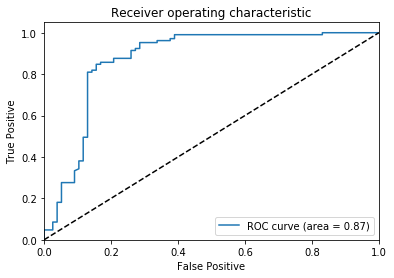

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_label = [i[1] for i in results_final]
y_score = [i[0] for i in results_final]
 
fpr, tpr, _ = roc_curve(y_label, y_score)
roc_auc = auc(fpr, tpr)
 
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()